In [50]:
import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt   
import seaborn as sns
%matplotlib inline 
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split,GridSearchCV

from imblearn.over_sampling import SMOTE 
from sklearn import metrics

import warnings
warnings.filterwarnings("ignore")

In [51]:
data = pd.read_excel("Laptop_SM_Tourism.xlsx")

data.head().T

,0,1,2,3,4
UserID,1005882,1005884,1005886,1005889,1005907
Taken_product,No,No,No,No,Yes
Yearly_avg_view_on_travel_page,379,255,250,295,250
preferred_device,Laptop,Laptop,Laptop,Laptop,Laptop
total_likes_on_outstation_checkin_given,9776,48725,35184,7572,39379
yearly_avg_Outstation_checkins,8,3,2,23,16
member_in_family,1,4,2,3,1
preferred_location_type,Beach,Beach,Beach,Beach,Beach
Yearly_avg_comment_on_travel_page,64,59,84,48,80
total_likes_on_outofstation_checkin_received,5142,2913,3074,9532,3926


In [52]:
data_Laptop = data.drop('UserID',axis=1)

In [53]:
data_Laptop.head().T

,0,1,2,3,4
Taken_product,No,No,No,No,Yes
Yearly_avg_view_on_travel_page,379,255,250,295,250
preferred_device,Laptop,Laptop,Laptop,Laptop,Laptop
total_likes_on_outstation_checkin_given,9776,48725,35184,7572,39379
yearly_avg_Outstation_checkins,8,3,2,23,16
member_in_family,1,4,2,3,1
preferred_location_type,Beach,Beach,Beach,Beach,Beach
Yearly_avg_comment_on_travel_page,64,59,84,48,80
total_likes_on_outofstation_checkin_received,5142,2913,3074,9532,3926
week_since_last_outstation_checkin,1,1,0,0,1


In [54]:
data_Laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Taken_product                                 1108 non-null   object
 1   Yearly_avg_view_on_travel_page                1108 non-null   int64 
 2   preferred_device                              1108 non-null   object
 3   total_likes_on_outstation_checkin_given       1108 non-null   int64 
 4   yearly_avg_Outstation_checkins                1108 non-null   int64 
 5   member_in_family                              1108 non-null   int64 
 6   preferred_location_type                       1108 non-null   object
 7   Yearly_avg_comment_on_travel_page             1108 non-null   int64 
 8   total_likes_on_outofstation_checkin_received  1108 non-null   int64 
 9   week_since_last_outstation_checkin            1108 non-null   int64 
 10  

In [55]:
data_Laptop.isnull().sum()

Taken_product                                   0
Yearly_avg_view_on_travel_page                  0
preferred_device                                0
total_likes_on_outstation_checkin_given         0
yearly_avg_Outstation_checkins                  0
member_in_family                                0
preferred_location_type                         0
Yearly_avg_comment_on_travel_page               0
total_likes_on_outofstation_checkin_received    0
week_since_last_outstation_checkin              0
following_company_page                          0
montly_avg_comment_on_company_page              0
working_flag                                    0
travelling_network_rating                       0
Adult_flag                                      0
Daily_Avg_mins_spend_on_traveling_page          0
dtype: int64

In [56]:
df1c=data_Laptop.copy()
df1c

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,No,379,Laptop,9776,8,1,Beach,64,5142,1,No,33,Yes,4,1,10
1,No,255,Laptop,48725,3,4,Beach,59,2913,1,Yes,19,No,3,0,8
2,No,250,Laptop,35184,2,2,Beach,84,3074,0,No,23,No,3,0,8
3,No,295,Laptop,7572,23,3,Beach,48,9532,0,No,33,Yes,2,0,10
4,Yes,250,Laptop,39379,16,1,Beach,80,3926,1,Yes,33,Yes,2,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1103,No,278,Laptop,24127,4,2,Beach,115,5184,7,No,35,No,2,3,23
1104,Yes,388,Laptop,30775,1,4,Beach,109,6787,8,No,29,No,4,2,14
1105,No,268,Laptop,42010,18,4,Beach,98,5753,2,Yes,34,No,4,2,17
1106,No,279,Laptop,30987,23,2,Historical site,58,2616,4,No,36,No,3,1,23


In [57]:
df1c['preferred_location_type'].value_counts()

Beach              492
Historical site    344
Big Cities         108
Trekking            84
Other               56
Hill Stations       24
Name: preferred_location_type, dtype: int64

In [58]:
print('Feature: Preferred location type')
print(pd.Categorical(df1c['preferred_location_type'].unique()))
print(pd.Categorical(df1c['preferred_location_type'].unique()).codes)
df1c['preferred_location_type'] = pd.Categorical(df1c['preferred_location_type']).codes

Feature: Preferred location type
['Beach', 'Historical site', 'Big Cities', 'Trekking', 'Other', 'Hill Stations']
Categories (6, object): ['Beach', 'Big Cities', 'Hill Stations', 'Historical site', 'Other', 'Trekking']
[0 3 1 5 4 2]


In [59]:
df1c['preferred_location_type'].value_counts()

0    492
3    344
1    108
5     84
4     56
2     24
Name: preferred_location_type, dtype: int64

In [60]:
df_laptop = df1c.copy()

df_laptop.head()

,Taken_product,Yearly_avg_view_on_travel_page,preferred_device,total_likes_on_outstation_checkin_given,yearly_avg_Outstation_checkins,member_in_family,preferred_location_type,Yearly_avg_comment_on_travel_page,total_likes_on_outofstation_checkin_received,week_since_last_outstation_checkin,following_company_page,montly_avg_comment_on_company_page,working_flag,travelling_network_rating,Adult_flag,Daily_Avg_mins_spend_on_traveling_page
0,No,379,Laptop,9776,8,1,0,64,5142,1,No,33,Yes,4,1,10
1,No,255,Laptop,48725,3,4,0,59,2913,1,Yes,19,No,3,0,8
2,No,250,Laptop,35184,2,2,0,84,3074,0,No,23,No,3,0,8
3,No,295,Laptop,7572,23,3,0,48,9532,0,No,33,Yes,2,0,10
4,Yes,250,Laptop,39379,16,1,0,80,3926,1,Yes,33,Yes,2,0,10


In [61]:
df_laptop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1108 entries, 0 to 1107
Data columns (total 16 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Taken_product                                 1108 non-null   object
 1   Yearly_avg_view_on_travel_page                1108 non-null   int64 
 2   preferred_device                              1108 non-null   object
 3   total_likes_on_outstation_checkin_given       1108 non-null   int64 
 4   yearly_avg_Outstation_checkins                1108 non-null   int64 
 5   member_in_family                              1108 non-null   int64 
 6   preferred_location_type                       1108 non-null   int8  
 7   Yearly_avg_comment_on_travel_page             1108 non-null   int64 
 8   total_likes_on_outofstation_checkin_received  1108 non-null   int64 
 9   week_since_last_outstation_checkin            1108 non-null   int64 
 10  

In [62]:
df_laptop.shape

(1108, 16)

In [63]:
from scipy.stats import zscore

In [64]:
df_laptop.T

,0,1,2,3,4,5,6,7,8,9,...,1098,1099,1100,1101,1102,1103,1104,1105,1106,1107
Taken_product,No,No,No,No,Yes,No,No,No,No,No,...,No,No,No,No,Yes,No,Yes,No,No,No
Yearly_avg_view_on_travel_page,379,255,250,295,250,253,215,228,356,254,...,256,290,314,298,177,278,388,268,279,382
preferred_device,Laptop,Laptop,Laptop,Laptop,Laptop,Laptop,Laptop,Laptop,Laptop,Laptop,...,Laptop,Laptop,Laptop,Laptop,Laptop,Laptop,Laptop,Laptop,Laptop,Laptop
total_likes_on_outstation_checkin_given,9776,48725,35184,7572,39379,39944,34793,25245,42388,18033,...,45667,50584,24277,17837,22385,24127,30775,42010,30987,35851
yearly_avg_Outstation_checkins,8,3,2,23,16,1,8,1,5,1,...,7,1,11,6,9,4,1,18,23,2
member_in_family,1,4,2,3,1,3,3,2,4,2,...,2,4,3,4,3,2,4,4,2,3
preferred_location_type,0,0,0,0,0,0,0,3,1,0,...,0,4,5,0,1,0,0,0,3,3
Yearly_avg_comment_on_travel_page,64,59,84,48,80,53,41,61,107,108,...,57,100,92,87,48,115,109,98,58,83
total_likes_on_outofstation_checkin_received,5142,2913,3074,9532,3926,5385,8732,4017,5782,13467,...,6021,3039,6392,5380,1851,5184,6787,5753,2616,5444
week_since_last_outstation_checkin,1,1,0,0,1,2,1,1,4,1,...,2,1,1,2,1,7,8,2,4,3


In [65]:
df_laptop['preferred_device']=df_laptop['preferred_device'].replace({'Laptop':1})

In [66]:
df_laptop['preferred_device'].value_counts()

1    1108
Name: preferred_device, dtype: int64

In [67]:
df_laptop['Taken_product']=df_laptop['Taken_product'].replace('No',0)
df_laptop['Taken_product']=df_laptop['Taken_product'].replace('Yes',1)

In [68]:
df_laptop['Taken_product'].value_counts()0.90

0    832
1    276
Name: Taken_product, dtype: int64

In [69]:
df_laptop['following_company_page']=df_laptop['following_company_page'].replace('No',0)
df_laptop['following_company_page']=df_laptop['following_company_page'].replace('Yes',1)

In [70]:
df_laptop['following_company_page'].value_counts()

0    764
1    344
Name: following_company_page, dtype: int64

In [71]:
df_laptop['working_flag']=df_laptop['working_flag'].replace('No',0)
df_laptop['working_flag']=df_laptop['working_flag'].replace('Yes',1)

In [72]:
df_laptop['working_flag'].value_counts()

0    924
1    184
Name: working_flag, dtype: int64

In [73]:
X= df_laptop.drop(["Taken_product"],axis=1)

In [74]:
y=df_laptop.Taken_product

In [75]:
X.head().T

,0,1,2,3,4
Yearly_avg_view_on_travel_page,379,255,250,295,250
preferred_device,1,1,1,1,1
total_likes_on_outstation_checkin_given,9776,48725,35184,7572,39379
yearly_avg_Outstation_checkins,8,3,2,23,16
member_in_family,1,4,2,3,1
preferred_location_type,0,0,0,0,0
Yearly_avg_comment_on_travel_page,64,59,84,48,80
total_likes_on_outofstation_checkin_received,5142,2913,3074,9532,3926
week_since_last_outstation_checkin,1,1,0,0,1
following_company_page,0,1,0,0,1


In [76]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: Taken_product, dtype: int64

In [77]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

In [78]:
X_train.head().T

,667,737,820,385,785
Yearly_avg_view_on_travel_page,328,281,246,365,370
preferred_device,1,1,1,1,1
total_likes_on_outstation_checkin_given,20006,21306,26433,25177,24832
yearly_avg_Outstation_checkins,8,7,26,27,7
member_in_family,3,3,4,2,2
preferred_location_type,0,1,1,0,3
Yearly_avg_comment_on_travel_page,81,96,86,85,113
total_likes_on_outofstation_checkin_received,18493,4691,5685,6404,2718
week_since_last_outstation_checkin,2,3,3,4,4
following_company_page,0,0,1,1,1


In [79]:
y_train.head().T

667    0
737    0
820    1
385    1
785    1
Name: Taken_product, dtype: int64

In [80]:
X_test.head().T

,304,1072,126,976,236
Yearly_avg_view_on_travel_page,245,297,202,267,239
preferred_device,1,1,1,1,1
total_likes_on_outstation_checkin_given,24120,20838,44910,21684,5714
yearly_avg_Outstation_checkins,9,2,1,3,24
member_in_family,2,2,3,1,1
preferred_location_type,3,3,3,0,5
Yearly_avg_comment_on_travel_page,47,95,57,53,40
total_likes_on_outofstation_checkin_received,4675,2538,4304,7818,5245
week_since_last_outstation_checkin,0,5,1,1,2
following_company_page,0,0,0,0,0


In [81]:
y_test.head().T

304     0
1072    0
126     0
976     0
236     0
Name: Taken_product, dtype: int64

In [82]:
X_train.shape

(775, 15)

In [83]:
y_train.shape

(775,)

In [84]:
X_test.shape

(333, 15)

In [85]:
y_test.shape

(333,)

--------------------------------------------------------------------------------------------------------------------------------

CART

In [86]:
from sklearn.tree import DecisionTreeClassifier #from scikit Learn

In [87]:
# Initialise a Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion = 'gini' )

In [88]:
# Fit the model
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [89]:
from sklearn import tree

train_char_label = ['No', 'Yes']
ld_Tree_File = open('ld_Tree_File.dot','w')
dot_data = tree.export_graphviz(dt_model, 
                                out_file=ld_Tree_File, 
                                feature_names = list(X_train), 
                                class_names = list(train_char_label))

ld_Tree_File.close()

In [90]:
print (pd.DataFrame(dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                                   Imp
Yearly_avg_view_on_travel_page                0.217251
total_likes_on_outstation_checkin_given       0.161349
total_likes_on_outofstation_checkin_received  0.129170
Yearly_avg_comment_on_travel_page             0.070665
Daily_Avg_mins_spend_on_traveling_page        0.065498
week_since_last_outstation_checkin            0.063407
yearly_avg_Outstation_checkins                0.063226
following_company_page                        0.059435
working_flag                                  0.046429
member_in_family                              0.043365
preferred_location_type                       0.028672
travelling_network_rating                     0.024657
Adult_flag                                    0.023320
montly_avg_comment_on_company_page            0.003556
preferred_device                              0.000000


In [91]:
y_predict = dt_model.predict(X_test)

In [92]:
y_predict.shape

(333,)

In [93]:
ytrain_predict = dt_model.predict(X_train)
ytest_predict = dt_model.predict(X_test)

In [94]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (775,)
ytest_predict (333,)


In [95]:
ytest_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,

In [96]:
ytest_predict_prob=dt_model.predict_proba(X_test)
ytest_predict_prob

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [97]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


AUC: 1.000


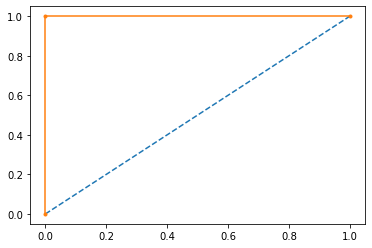

In [98]:
# predict probabilities
probs = dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.922


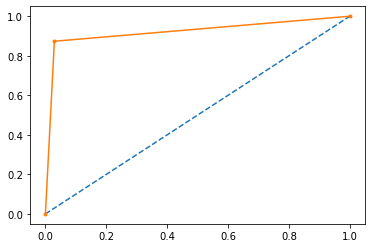

In [99]:
# predict probabilities
probs = dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [100]:
from sklearn.metrics import classification_report,confusion_matrix

In [101]:
confusion_matrix(y_train, ytrain_predict)

array([[594,   0],
       [  0, 181]], dtype=int64)

In [102]:
#Train Data Accuracy
dt_model.score(X_train,y_train) 

1.0

In [103]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



In [104]:
confusion_matrix(y_test, ytest_predict)

array([[231,   7],
       [ 12,  83]], dtype=int64)

In [105]:
#Test Data Accuracy
dt_model.score(X_test,y_test)

0.9429429429429429

In [106]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       238
           1       0.92      0.87      0.90        95

    accuracy                           0.94       333
   macro avg       0.94      0.92      0.93       333
weighted avg       0.94      0.94      0.94       333



TUNING

In [107]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 9,min_samples_leaf=10,min_samples_split=80)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=80)

In [108]:
ld_tree_regularized = open('ld_tree_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= ld_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

ld_tree_regularized.close()
dot_data

In [109]:
print (pd.DataFrame(reg_dt_model.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values('Imp',ascending=False))

                                                   Imp
Yearly_avg_view_on_travel_page                0.392451
total_likes_on_outofstation_checkin_received  0.292289
following_company_page                        0.157448
yearly_avg_Outstation_checkins                0.095914
member_in_family                              0.027941
total_likes_on_outstation_checkin_given       0.025798
Yearly_avg_comment_on_travel_page             0.008159
preferred_device                              0.000000
preferred_location_type                       0.000000
week_since_last_outstation_checkin            0.000000
montly_avg_comment_on_company_page            0.000000
working_flag                                  0.000000
travelling_network_rating                     0.000000
Adult_flag                                    0.000000
Daily_Avg_mins_spend_on_traveling_page        0.000000


In [110]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [111]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (775,)
ytest_predict (333,)


In [112]:
ytest_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [113]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.84210526, 0.15789474],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.7037037 , 0.2962963 ],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [0.94366197, 0.05633803],
       [0.36231884, 0.63768116],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.7037037 , 0.2962963 ],
       [0.76363636, 0.23636364],
       [0.52307692, 0.47692308],
       [0.52307692, 0.47692308],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [0.6       , 0.4       ],
       [0.76363636, 0.23636364],
       [0.36231884, 0.63768116],
       [1.        , 0.        ],
       [0.4       , 0.6       ],
       [0.52307692, 0.47692308],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [0.36231884, 0.63768116],
       [0.76363636, 0.23636364],
       [0.7037037 , 0.2962963 ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.

In [114]:
 pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.842105,0.157895
1,0.943662,0.056338
2,1.000000,0.000000
3,1.000000,0.000000
4,0.703704,0.296296


AUC: 0.886


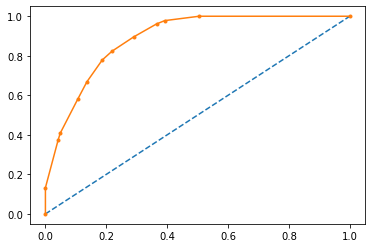

In [115]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.881


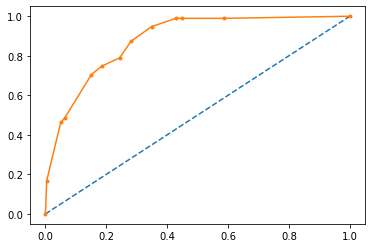

In [116]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [117]:
from sklearn.metrics import classification_report,confusion_matrix

In [118]:
#Train Data Accuracy
reg_dt_model.score(X_train,y_train)

0.824516129032258

In [119]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       594
           1       0.72      0.41      0.52       181

    accuracy                           0.82       775
   macro avg       0.78      0.68      0.71       775
weighted avg       0.81      0.82      0.81       775



In [120]:
confusion_matrix(y_test, ytest_predict)

array([[223,  15],
       [ 49,  46]], dtype=int64)

In [121]:
#Test Data Accuracy
reg_dt_model.score(X_test,y_test)

0.8078078078078078

In [122]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       238
           1       0.75      0.48      0.59        95

    accuracy                           0.81       333
   macro avg       0.79      0.71      0.73       333
weighted avg       0.80      0.81      0.79       333



-------------------------------------------------------------------------------------------------------------------------------------------------------

SMOTE

In [125]:
smote = SMOTE()


X_train_res, y_train_res = smote.fit_resample(X_train, y_train.ravel())

In [126]:
## Let's check the shape after SMOTE
X_train_res.shape

(1188, 15)

In [127]:
smote_cart_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 9,min_samples_leaf=10,min_samples_split=80)
smote_cart_model.fit(X_train_res, y_train_res)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=10, min_samples_split=80)

In [128]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [129]:
print('ytrain_predict',ytrain_predict.shape)
print('ytest_predict',ytest_predict.shape)

ytrain_predict (775,)
ytest_predict (333,)


In [130]:
ytest_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,

In [131]:
ytest_predict_prob=reg_dt_model.predict_proba(X_test)
ytest_predict_prob

array([[0.84210526, 0.15789474],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.7037037 , 0.2962963 ],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [0.94366197, 0.05633803],
       [0.36231884, 0.63768116],
       [1.        , 0.        ],
       [1.        , 0.        ],
       [0.7037037 , 0.2962963 ],
       [0.76363636, 0.23636364],
       [0.52307692, 0.47692308],
       [0.52307692, 0.47692308],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [0.6       , 0.4       ],
       [0.76363636, 0.23636364],
       [0.36231884, 0.63768116],
       [1.        , 0.        ],
       [0.4       , 0.6       ],
       [0.52307692, 0.47692308],
       [0.94366197, 0.05633803],
       [1.        , 0.        ],
       [0.36231884, 0.63768116],
       [0.76363636, 0.23636364],
       [0.7037037 , 0.2962963 ],
       [1.        , 0.        ],
       [0.        , 1.        ],
       [1.

In [132]:
pd.DataFrame(ytest_predict_prob).head()

,0,1
0,0.842105,0.157895
1,0.943662,0.056338
2,1.000000,0.000000
3,1.000000,0.000000
4,0.703704,0.296296


AUC: 0.886


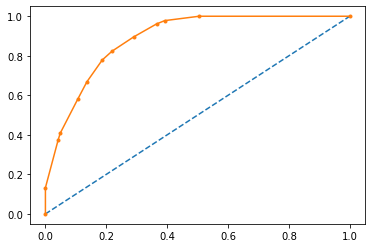

In [133]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.881


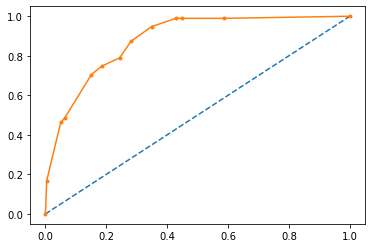

In [134]:
# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [135]:
from sklearn.metrics import classification_report,confusion_matrix

In [136]:
confusion_matrix(y_train, ytrain_predict)

array([[565,  29],
       [107,  74]], dtype=int64)

In [137]:
#Train Data Accuracy
reg_dt_model.score(X_train,y_train)

0.824516129032258

In [138]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       594
           1       0.72      0.41      0.52       181

    accuracy                           0.82       775
   macro avg       0.78      0.68      0.71       775
weighted avg       0.81      0.82      0.81       775



In [139]:
confusion_matrix(y_test, ytest_predict)

array([[223,  15],
       [ 49,  46]], dtype=int64)

In [140]:
#Test Data Accuracy
reg_dt_model.score(X_test,y_test)

0.8078078078078078

In [141]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.82      0.94      0.87       238
           1       0.75      0.48      0.59        95

    accuracy                           0.81       333
   macro avg       0.79      0.71      0.73       333
weighted avg       0.80      0.81      0.79       333



--------------------------------------------------------------------------------------------------------------------------------------

LOGISTIC REGRESSION

In [142]:
from sklearn.linear_model import LogisticRegression

In [143]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [144]:
log_train_predict = log_model.predict(X_train)
log_test_predict = log_model.predict(X_test)

In [145]:
log_model.score(X_train,y_train)

0.8

In [146]:
log_model.score(X_test,y_test)

0.7447447447447447

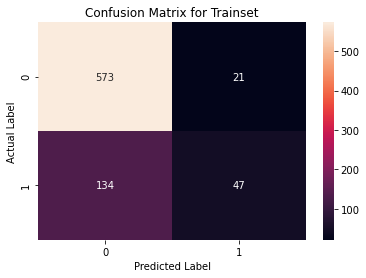

In [147]:
#Confusion Matrix for Train set
confusion_matrix(y_train,log_train_predict)
sns.heatmap(confusion_matrix(y_train,log_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [148]:
print(classification_report(y_train,log_train_predict)) 

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       594
           1       0.69      0.26      0.38       181

    accuracy                           0.80       775
   macro avg       0.75      0.61      0.63       775
weighted avg       0.78      0.80      0.76       775



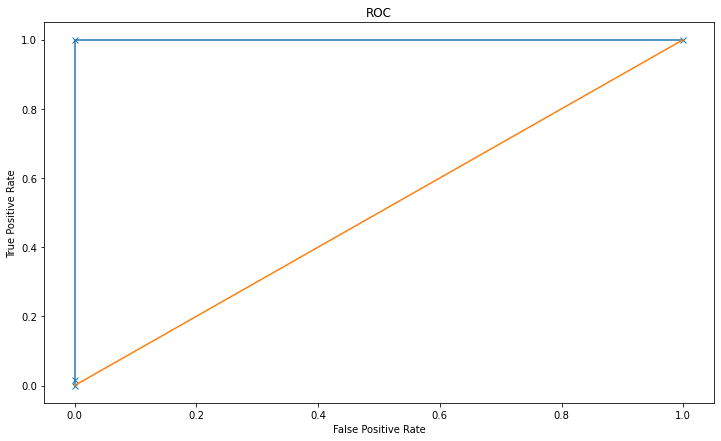

Area under Curve is 1.0


In [149]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(log_train_predict,log_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(log_train_predict,log_model.predict_proba(X_train)[:,1]))

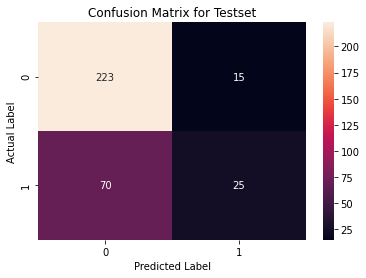

In [150]:
#Confusion Matrix for Train set
confusion_matrix(y_test,log_test_predict)
sns.heatmap(confusion_matrix(y_test,log_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [151]:
print(classification_report(y_test,log_test_predict)) 

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       238
           1       0.62      0.26      0.37        95

    accuracy                           0.74       333
   macro avg       0.69      0.60      0.61       333
weighted avg       0.72      0.74      0.71       333



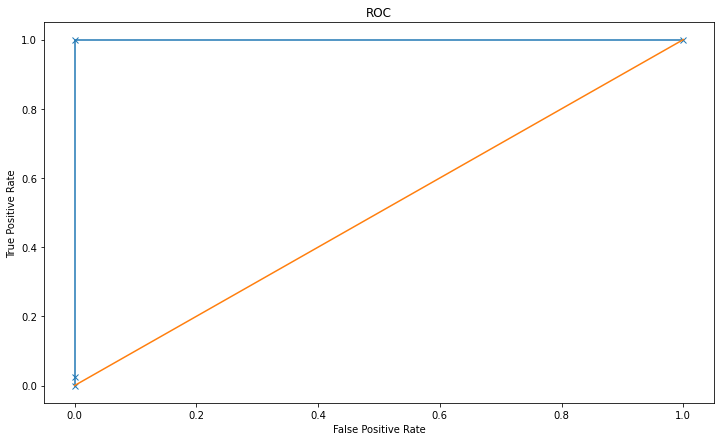

Area under Curve is 1.0


In [152]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(log_test_predict,log_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(log_test_predict,log_model.predict_proba(X_test)[:,1]))

In [153]:
grid_log={'penalty':['none', 'l1', 'l2', 'elasticnet'],
      'solver':['sag','lbfgs','newtoncg','lbfgs', 'liblinear', 'saga'],
      'tol':[0.0001,0.00001]}

In [154]:
grid_search1 = GridSearchCV(estimator = log_model, param_grid = grid_log, cv = 3,n_jobs=-1,scoring='f1')

In [155]:
grid_search1.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'penalty': ['none', 'l1', 'l2', 'elasticnet'],
                         'solver': ['sag', 'lbfgs', 'newtoncg', 'lbfgs',
                                    'liblinear', 'saga'],
                         'tol': [0.0001, 1e-05]},
             scoring='f1')

In [156]:
print(grid_search1.best_params_,'\n')
print(grid_search1.best_estimator_)

{'penalty': 'l2', 'solver': 'liblinear', 'tol': 1e-05} 

LogisticRegression(solver='liblinear', tol=1e-05)


In [157]:
best_model1 = grid_search1.best_estimator_

In [158]:
# Prediction on the training set

log_train_predict = best_model1.predict(X_train)
log_test_predict = best_model1.predict(X_test)

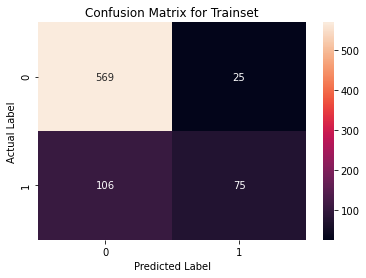

In [159]:
#Confusion Matrix for Train set
confusion_matrix(y_train,log_train_predict)
sns.heatmap(confusion_matrix(y_train,log_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [160]:
print(classification_report(y_train,log_train_predict)) 

              precision    recall  f1-score   support

           0       0.84      0.96      0.90       594
           1       0.75      0.41      0.53       181

    accuracy                           0.83       775
   macro avg       0.80      0.69      0.72       775
weighted avg       0.82      0.83      0.81       775



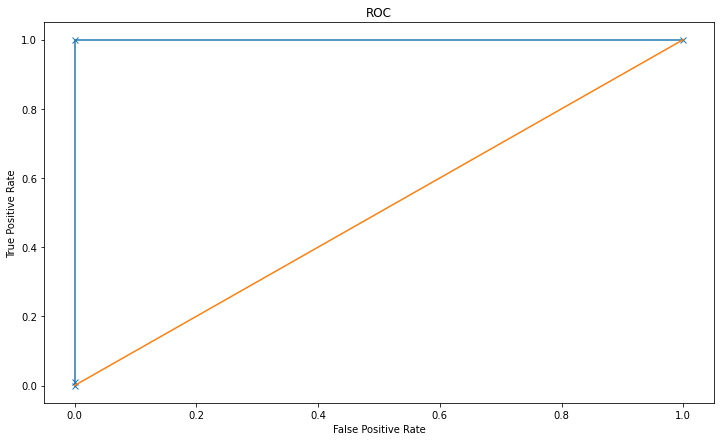

Area under Curve is 1.0


In [161]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(log_train_predict,best_model1.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(log_train_predict,best_model1.predict_proba(X_train)[:,1]))

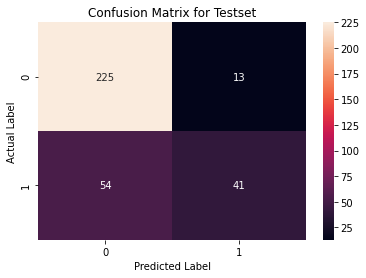

In [162]:
#Confusion Matrix for Test set
confusion_matrix(y_test,log_test_predict)
sns.heatmap(confusion_matrix(y_test,log_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()


In [163]:
print(classification_report(y_test,log_test_predict)) 

              precision    recall  f1-score   support

           0       0.81      0.95      0.87       238
           1       0.76      0.43      0.55        95

    accuracy                           0.80       333
   macro avg       0.78      0.69      0.71       333
weighted avg       0.79      0.80      0.78       333



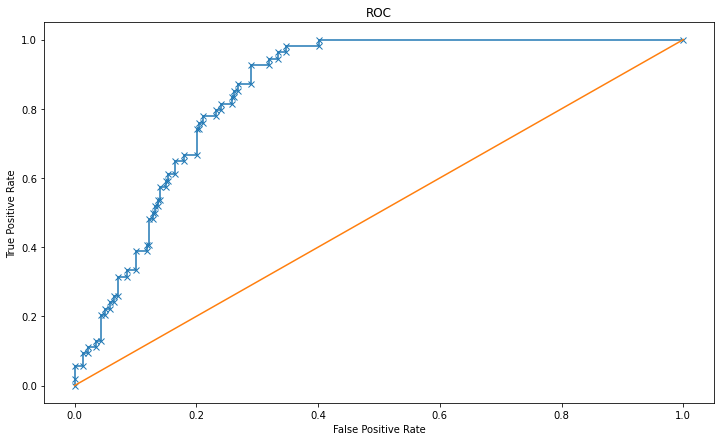

Area under Curve is 0.854042214257268


In [164]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(log_test_predict,log_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'logit')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(log_test_predict,log_model.predict_proba(X_test)[:,1]))

Feature: 0, Score: -0.00350
Feature: 1, Score: 0.00664
Feature: 2, Score: -0.00002
Feature: 3, Score: 0.05254
Feature: 4, Score: 0.00769
Feature: 5, Score: -0.13376
Feature: 6, Score: 0.01481
Feature: 7, Score: -0.00014
Feature: 8, Score: 0.20998
Feature: 9, Score: 1.42677
Feature: 10, Score: 0.02031
Feature: 11, Score: -0.13256
Feature: 12, Score: -0.30616
Feature: 13, Score: -0.36956
Feature: 14, Score: -0.07825


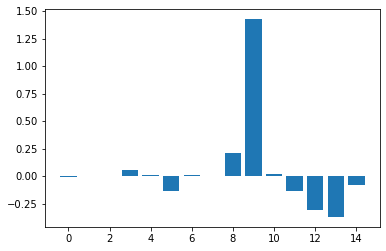

In [165]:
# get importance
importance = best_model1.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

------------------------------------------------------------------------------------------------------------------------------------------------------------

LINEAR DISCRIMINANT ANALYSIS

In [167]:
LDA = LinearDiscriminantAnalysis()
lda_model=LDA.fit(X_train, y_train)
lda_model

LinearDiscriminantAnalysis()

In [168]:
 lda_train_predict = lda_model.predict(X_train)
lda_test_predict = lda_model.predict(X_test)

In [169]:
lda_model.score(X_train,y_train)

0.8193548387096774

In [170]:
lda_model.score(X_test,y_test)

0.8078078078078078

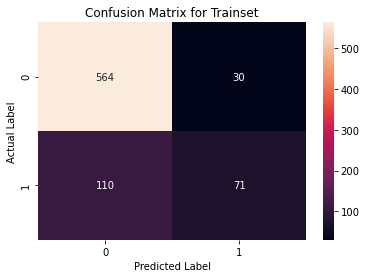

In [171]:
#Confusion Matrix for Train set
confusion_matrix(y_train,lda_train_predict)
sns.heatmap(confusion_matrix(y_train,lda_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [172]:
print(classification_report(y_train,lda_train_predict)) 

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       594
           1       0.70      0.39      0.50       181

    accuracy                           0.82       775
   macro avg       0.77      0.67      0.70       775
weighted avg       0.81      0.82      0.80       775



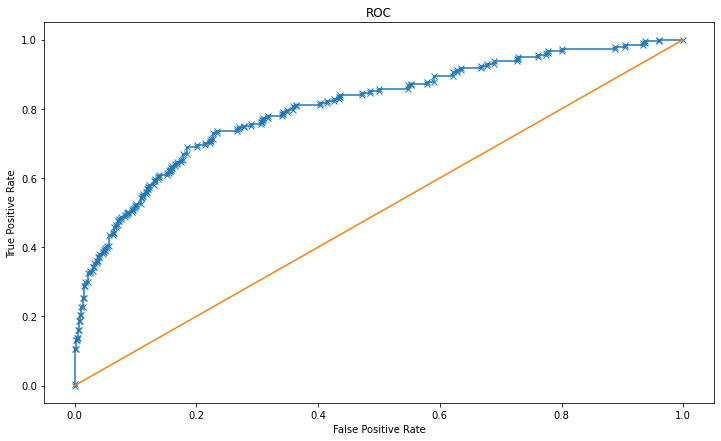

Area under Curve is 0.8056160127983332


In [173]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_train,lda_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_train,lda_model.predict_proba(X_train)[:,1]))

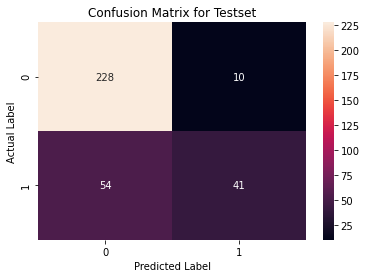

In [174]:
#Confusion Matrix for Test set
confusion_matrix(y_test,lda_test_predict)
sns.heatmap(confusion_matrix(y_test,lda_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [175]:
print(classification_report(y_test,lda_test_predict)) 

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       238
           1       0.80      0.43      0.56        95

    accuracy                           0.81       333
   macro avg       0.81      0.69      0.72       333
weighted avg       0.81      0.81      0.79       333



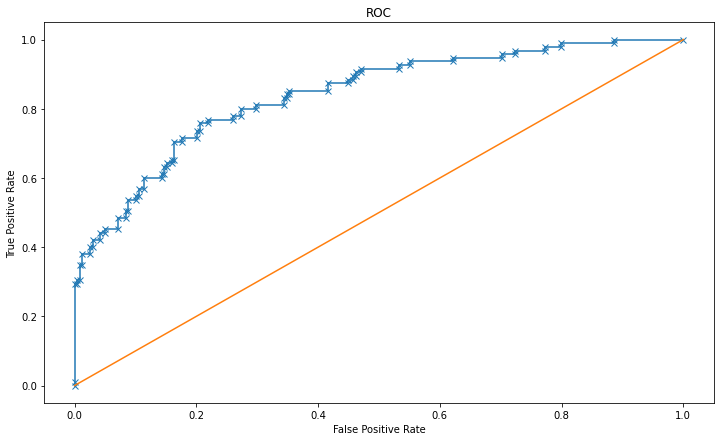

Area under Curve is 0.8405130473241929


In [176]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_test,lda_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_test,lda_model.predict_proba(X_test)[:,1]))

In [177]:
grid_lda={ 'solver':['svd', 'lsqr', 'eigen'],
          'shrinkage':['auto', 'float','none'],
          'tol':[0.001,0.0001,0.00001]}

In [178]:
grid_search2 = GridSearchCV(estimator = lda_model, param_grid = grid_lda, cv = 3,n_jobs=-1,scoring='f1')

In [179]:
grid_search2.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(), n_jobs=-1,
             param_grid={'shrinkage': ['auto', 'float', 'none'],
                         'solver': ['svd', 'lsqr', 'eigen'],
                         'tol': [0.001, 0.0001, 1e-05]},
             scoring='f1')

In [180]:
lda_model.score(X_test,y_test)

0.8078078078078078

In [181]:
print(grid_search2.best_params_,'\n')
print(grid_search2.best_estimator_)

{'shrinkage': 'auto', 'solver': 'lsqr', 'tol': 0.001} 

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr', tol=0.001)


In [182]:
best_model2 = grid_search2.best_estimator_

In [183]:
lda_train_predict = best_model2.predict(X_train)
lda_test_predict = best_model2.predict(X_test)

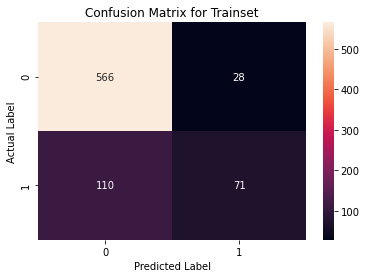

In [184]:
#Confusion Matrix for Train set
confusion_matrix(y_train,lda_train_predict)
sns.heatmap(confusion_matrix(y_train,lda_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [185]:
print(classification_report(y_train,lda_train_predict)) 

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       594
           1       0.72      0.39      0.51       181

    accuracy                           0.82       775
   macro avg       0.78      0.67      0.70       775
weighted avg       0.81      0.82      0.80       775



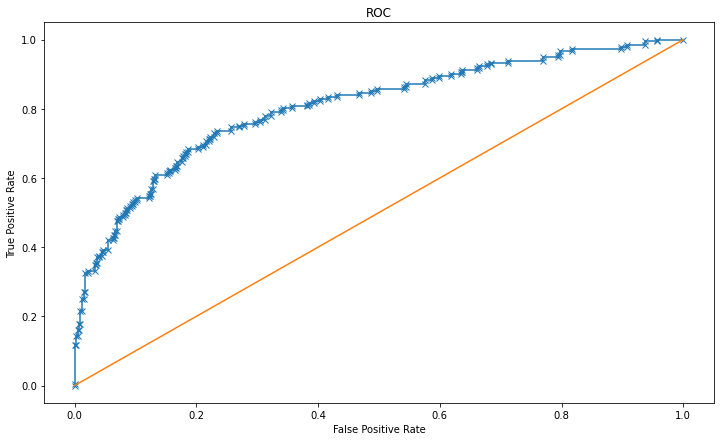

Area under Curve is 0.8054299905128633


In [186]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_train,best_model2.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_train,best_model2.predict_proba(X_train)[:,1]))

In [187]:
print(classification_report(y_test,lda_test_predict)) 

              precision    recall  f1-score   support

           0       0.81      0.96      0.88       238
           1       0.80      0.43      0.56        95

    accuracy                           0.81       333
   macro avg       0.81      0.69      0.72       333
weighted avg       0.81      0.81      0.79       333



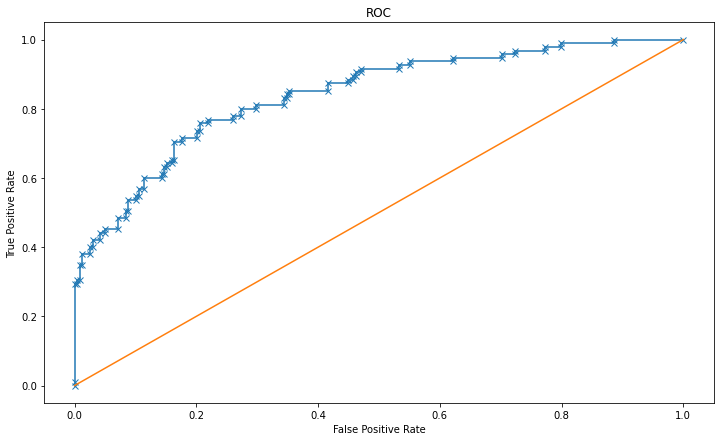

Area under Curve is 0.8405130473241929


In [188]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_test,lda_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'LDA')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_test,lda_model.predict_proba(X_test)[:,1]))

Feature: 0, Score: -0.00432
Feature: 1, Score: 0.00000
Feature: 2, Score: -0.00002
Feature: 3, Score: 0.04413
Feature: 4, Score: -0.01860
Feature: 5, Score: -0.11155
Feature: 6, Score: 0.01298
Feature: 7, Score: -0.00010
Feature: 8, Score: 0.19016
Feature: 9, Score: 1.70141
Feature: 10, Score: 0.01983
Feature: 11, Score: -0.05765
Feature: 12, Score: -0.27455
Feature: 13, Score: -0.39440
Feature: 14, Score: -0.06323


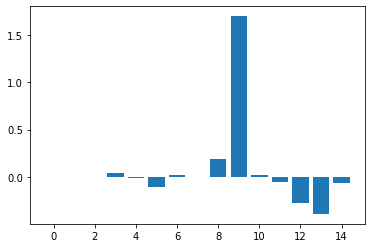

In [189]:
# get importance
importance = best_model2.coef_[0]
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

RANDOM FOREST

In [190]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model=RF_model.fit(X_train, y_train)

In [191]:
RF_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train, y_train)
print(model_score)


1.0


In [192]:
RF_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)

0.9819819819819819


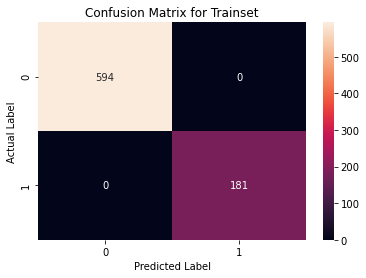

In [193]:
#Confusion Matrix for Train set
confusion_matrix(y_train,RF_train_predict)
sns.heatmap(confusion_matrix(y_train,RF_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [194]:
print(classification_report(y_train,RF_train_predict)) 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



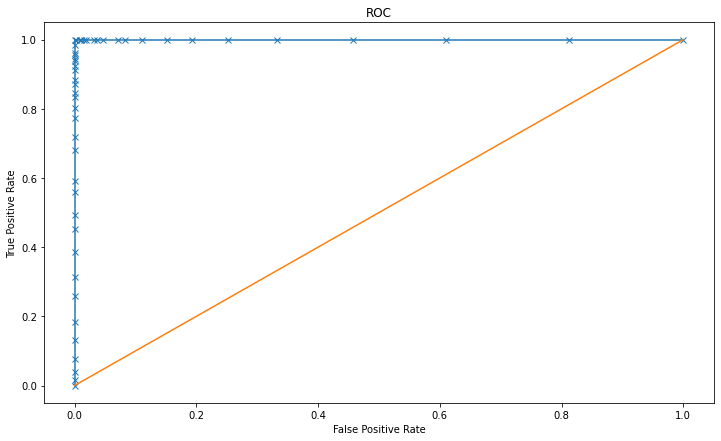

Area under Curve is 1.0


In [195]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_train,RF_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_train,RF_model.predict_proba(X_train)[:,1]))

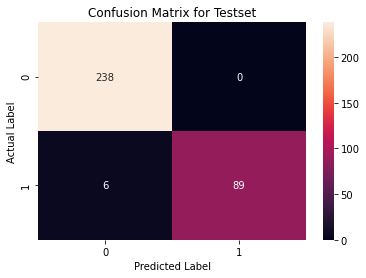

In [196]:
#Confusion Matrix for Test set
confusion_matrix(y_test,RF_test_predict)
sns.heatmap(confusion_matrix(y_test,RF_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [197]:
print(classification_report(y_test,RF_test_predict)) 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       238
           1       1.00      0.94      0.97        95

    accuracy                           0.98       333
   macro avg       0.99      0.97      0.98       333
weighted avg       0.98      0.98      0.98       333



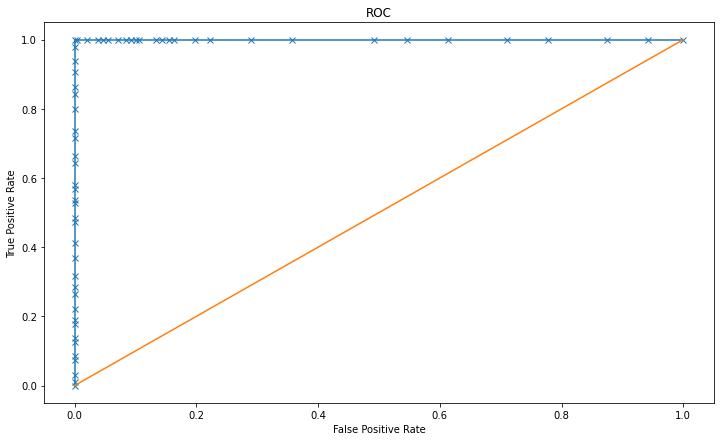

Area under Curve is 1.0


In [198]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_test,RF_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_test,RF_model.predict_proba(X_test)[:,1]))

In [199]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model=RF_model.fit(X_train, y_train)
RF_train_predict = RF_model.predict(X_train)
model_score = RF_model.score(X_train, y_train)
print(model_score)

1.0


In [200]:
RF_test_predict = RF_model.predict(X_test)
model_score = RF_model.score(X_test, y_test)
print(model_score)

0.9819819819819819


-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------

RANDOM FOREST USING GRID SEARCH

In [202]:
from sklearn.model_selection import RandomizedSearchCV

In [203]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100,200,300 ]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [100, 200, 300]}

In [204]:
param_grid={
    'max_depth':[7,8,9,10],
    'max_features':[3,4,5],
    'min_samples_leaf':[50,100],
    'min_samples_split':[150,300],
    'n_estimators':[100,200,300]
}
rfcl =RandomForestClassifier()
grid_search= GridSearchCV(estimator=rfcl,param_grid=param_grid,cv=3)

In [205]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [206]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20,
 'bootstrap': False}

In [207]:
best_grid = rf_random.best_estimator_

In [208]:
best_grid

RandomForestClassifier(bootstrap=False, max_depth=20, n_estimators=1800)

In [209]:
RF_train_predict = best_grid.predict(X_train)
RF_test_predict = best_grid.predict(X_test)

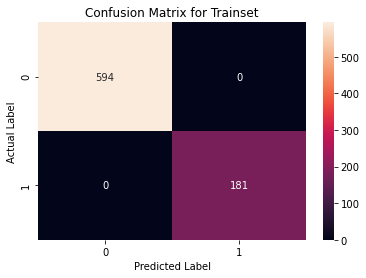

In [210]:
#Confusion Matrix for Test set
confusion_matrix(y_train,RF_train_predict)
sns.heatmap(confusion_matrix(y_train,RF_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [211]:
print(classification_report(y_train,RF_train_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       181

    accuracy                           1.00       775
   macro avg       1.00      1.00      1.00       775
weighted avg       1.00      1.00      1.00       775



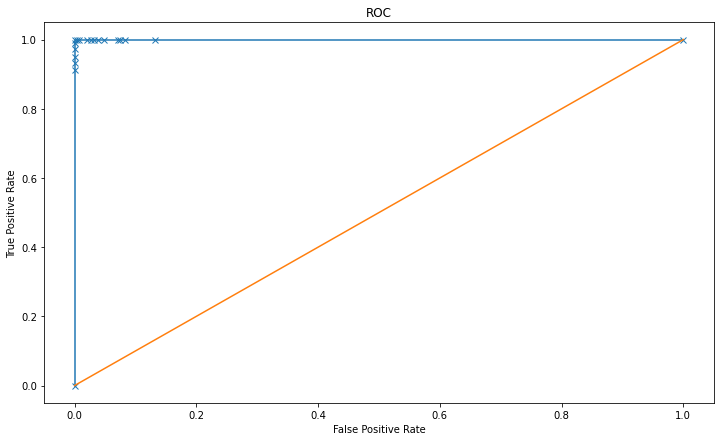

Area under Curve is 1.0


In [212]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_train,best_grid.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_train,best_grid.predict_proba(X_train)[:,1]))

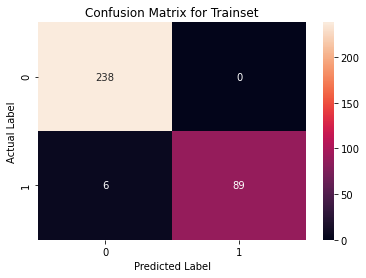

In [213]:
#Confusion Matrix for Test set
confusion_matrix(y_test,RF_test_predict)
sns.heatmap(confusion_matrix(y_test,RF_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [214]:
print(classification_report(y_test,RF_test_predict)) 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       238
           1       1.00      0.94      0.97        95

    accuracy                           0.98       333
   macro avg       0.99      0.97      0.98       333
weighted avg       0.98      0.98      0.98       333



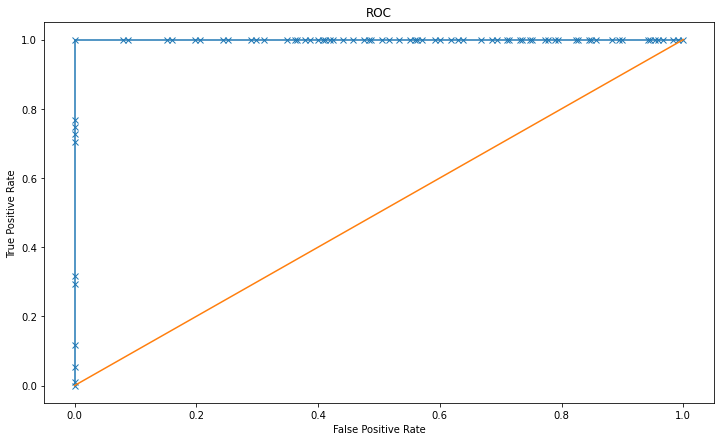

Area under Curve is 1.0


In [215]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_test,best_grid.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_test,best_grid.predict_proba(X_test)[:,1]))

Feature: 0, Score: 0.15564
Feature: 1, Score: 0.00000
Feature: 2, Score: 0.12750
Feature: 3, Score: 0.09564
Feature: 4, Score: 0.03989
Feature: 5, Score: 0.04564
Feature: 6, Score: 0.06510
Feature: 7, Score: 0.16650
Feature: 8, Score: 0.04710
Feature: 9, Score: 0.05415
Feature: 10, Score: 0.03434
Feature: 11, Score: 0.01391
Feature: 12, Score: 0.04819
Feature: 13, Score: 0.03811
Feature: 14, Score: 0.06828


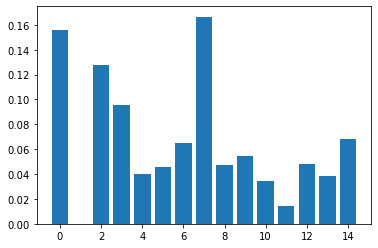

In [216]:
# get importance
importance = best_grid.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

-------------------------------------------------------------------------------------------------------------------------------------------------

KNN

In [218]:
from sklearn.neighbors import KNeighborsClassifier

In [219]:
# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in range(1,20,2):
    KNN = KNeighborsClassifier(n_neighbors=k)
    KNN.fit(X_train, y_train)
    # evaluate test accuracy
    scores = KNN.score(X_test, y_test)
    ac_scores.append(scores)

# accuracy scores for 1,3,5,7....
MCE = [1-x for x in ac_scores]
acc = [x for x in ac_scores]
acc

[1.0,
 0.954954954954955,
 0.8558558558558559,
 0.7867867867867868,
 0.7687687687687688,
 0.7327327327327328,
 0.7297297297297297,
 0.7357357357357357,
 0.7447447447447447,
 0.7507507507507507]

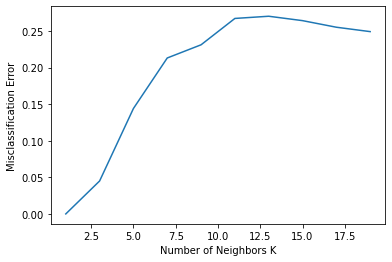

In [220]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(range(1,20,2), MCE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

By scree plot we see 3 is optimum number of k neighbours with accordance MCE

Therefore, building the KNN model with k=3

In [221]:
#model score k=3
KNN_model=KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train,y_train)
KNN_train_predict = KNN_model.predict(X_train)

KNN_test_predict = KNN_model.predict(X_test)

In [222]:
KNN_model.score(X_train,y_train)

0.9935483870967742

In [223]:
KNN_model.score(X_test,y_test)

0.954954954954955

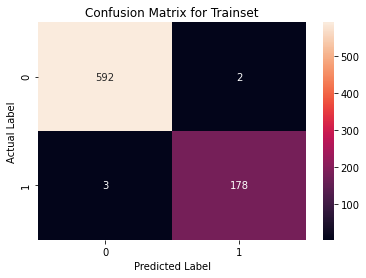

In [224]:
#Confusion Matrix for Train set
confusion_matrix(y_train,KNN_train_predict)
sns.heatmap(confusion_matrix(y_train,KNN_train_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Trainset')
plt.show()

In [225]:
print(classification_report(y_train,KNN_train_predict))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       594
           1       0.99      0.98      0.99       181

    accuracy                           0.99       775
   macro avg       0.99      0.99      0.99       775
weighted avg       0.99      0.99      0.99       775



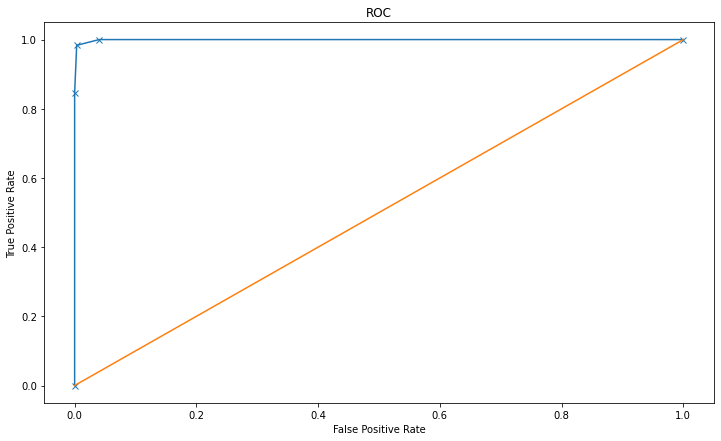

Area under Curve is 0.9994047286864967


In [226]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_train,KNN_model.predict_proba(X_train)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_train,KNN_model.predict_proba(X_train)[:,1]))

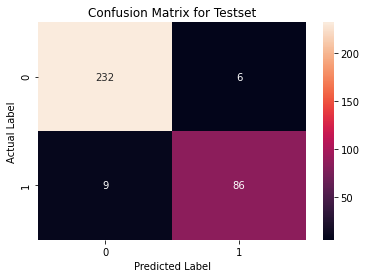

In [227]:
#Confusion Matrix for Train set
confusion_matrix(y_test,KNN_test_predict)
sns.heatmap(confusion_matrix(y_test,KNN_test_predict),annot = True,cbar = True,fmt = 'd',)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix for Testset')
plt.show()

In [228]:
print(classification_report(y_test,KNN_test_predict)) 

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       238
           1       0.93      0.91      0.92        95

    accuracy                           0.95       333
   macro avg       0.95      0.94      0.94       333
weighted avg       0.95      0.95      0.95       333



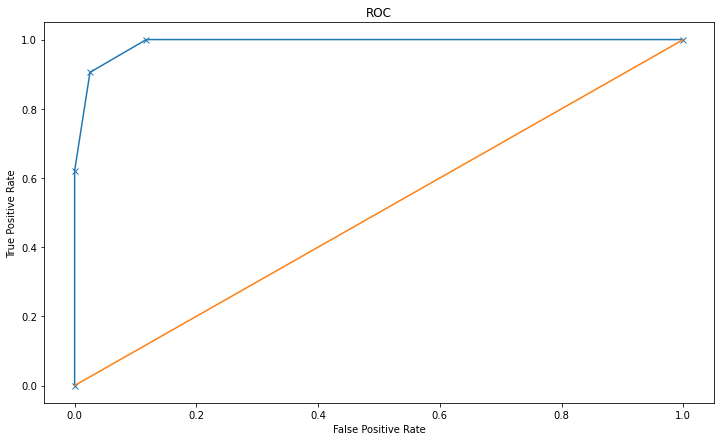

Area under Curve is 0.9896505970809376


In [229]:
from sklearn.metrics import roc_curve,roc_auc_score
rf_fpr,rf_tpr,_ = roc_curve(y_test,KNN_model.predict_proba(X_test)[:,1])
plt.figure(figsize = (12,7))
plt.plot(rf_fpr,rf_tpr,marker = 'x',label = 'RF')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))# can directly give plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()

print('Area under Curve is', roc_auc_score(y_test,KNN_model.predict_proba(X_test)[:,1]))

------------------------------------------------------------------------------------------------------------------------------------------------------------------

SMOTE

In [231]:
from imblearn.over_sampling import SMOTE 
from sklearn import metrics

In [232]:
sm = SMOTE()


X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [233]:
## Let's check the shape after SMOTE
X_train_res.shape

(1188, 15)

--------------------------------------------------------------------------------------------------------------------------------------------------------------

LOGIT

In [234]:
smote_log_model = LogisticRegression()
smote_log_model.fit(X_train_res, y_train_res)

LogisticRegression()

In [235]:
## Performance Matrix on train data set with SMOTE
smote_log_train_predict = smote_log_model.predict(X_train_res)
model_score = smote_log_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, smote_log_train_predict))
print(metrics.classification_report(y_train_res ,smote_log_train_predict))

0.6818181818181818
[[379 215]
 [163 431]]
              precision    recall  f1-score   support

           0       0.70      0.64      0.67       594
           1       0.67      0.73      0.70       594

    accuracy                           0.68      1188
   macro avg       0.68      0.68      0.68      1188
weighted avg       0.68      0.68      0.68      1188



In [236]:
smote_log_test_predict = smote_log_model.predict(X_test)
model_score = smote_log_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, smote_log_test_predict))
print(metrics.classification_report(y_test ,smote_log_test_predict))

0.6726726726726727
[[150  88]
 [ 21  74]]
              precision    recall  f1-score   support

           0       0.88      0.63      0.73       238
           1       0.46      0.78      0.58        95

    accuracy                           0.67       333
   macro avg       0.67      0.70      0.65       333
weighted avg       0.76      0.67      0.69       333



------------------------------------------------------------------------------------------------------------------------------------------------------------------

LDA

In [238]:
smote_lda_model = LinearDiscriminantAnalysis()
smote_lda_model.fit(X_train_res, y_train_res)

LinearDiscriminantAnalysis()

In [239]:
smote_lda_train_predict = smote_lda_model.predict(X_train_res)
smote_lda_test_predict = smote_lda_model.predict(X_test)

In [240]:
## Performance Matrix on train data set with SMOTE
smote_lda_train_predict = smote_lda_model.predict(X_train_res)
model_score = smote_log_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, smote_lda_train_predict))
print(metrics.classification_report(y_train_res ,smote_lda_train_predict))

0.6818181818181818
[[434 160]
 [157 437]]
              precision    recall  f1-score   support

           0       0.73      0.73      0.73       594
           1       0.73      0.74      0.73       594

    accuracy                           0.73      1188
   macro avg       0.73      0.73      0.73      1188
weighted avg       0.73      0.73      0.73      1188



In [241]:
smote_log_test_predict = smote_lda_model.predict(X_test)
model_score = smote_lda_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, smote_lda_test_predict))
print(metrics.classification_report(y_test ,smote_lda_test_predict))

0.7327327327327328
[[168  70]
 [ 19  76]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.79       238
           1       0.52      0.80      0.63        95

    accuracy                           0.73       333
   macro avg       0.71      0.75      0.71       333
weighted avg       0.79      0.73      0.74       333



----------------------------------------------------------------------------------------------------------------------------------------------------------------------

KNN

In [242]:
Smote_KNN = KNeighborsClassifier(n_neighbors=3)
Smote_KNN.fit(X_train_res, y_train_res)

KNeighborsClassifier(n_neighbors=3)

In [243]:
Smote_KNN_train_predict = Smote_KNN.predict(X_train_res)
Smote_KNN_test_predict = Smote_KNN.predict(X_test)

In [244]:
## Performance Matrix on train data set with SMOTE
Smote_KNN_train_predict = Smote_KNN.predict(X_train_res)
model_score = Smote_KNN.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, Smote_KNN_train_predict))
print(metrics.classification_report(y_train_res ,Smote_KNN_train_predict))

0.9831649831649831
[[591   3]
 [ 17 577]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       594
           1       0.99      0.97      0.98       594

    accuracy                           0.98      1188
   macro avg       0.98      0.98      0.98      1188
weighted avg       0.98      0.98      0.98      1188



In [245]:
smote_log_test_predict = Smote_KNN.predict(X_test)
model_score = Smote_KNN.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, smote_log_test_predict))
print(metrics.classification_report(y_test ,smote_log_test_predict))

0.963963963963964
[[229   9]
 [  3  92]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       238
           1       0.91      0.97      0.94        95

    accuracy                           0.96       333
   macro avg       0.95      0.97      0.96       333
weighted avg       0.97      0.96      0.96       333



------------------------------------------------------------------------------------------------------------------------------------------------------------------

RF

In [246]:
Smote_RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
Smote_RF_model=Smote_RF_model.fit(X_train_res, y_train_res)

In [247]:
Smote_RF_train_predict = Smote_RF_model.predict(X_train_res)
Smote_RF_test_predict = Smote_RF_model.predict(X_test)

In [248]:
## Performance Matrix on train data set with SMOTE
Smote_RF_train_predict = Smote_RF_model.predict(X_train_res)
model_score = Smote_RF_model.score(X_train_res, y_train_res)
print(model_score)
print(metrics.confusion_matrix(y_train_res, Smote_RF_train_predict))
print(metrics.classification_report(y_train_res ,Smote_RF_train_predict))

1.0
[[594   0]
 [  0 594]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       594
           1       1.00      1.00      1.00       594

    accuracy                           1.00      1188
   macro avg       1.00      1.00      1.00      1188
weighted avg       1.00      1.00      1.00      1188



In [250]:
Smote_RF_test_predict = Smote_RF_model.predict(X_test)
model_score = Smote_RF_model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, Smote_RF_test_predict))
print(metrics.classification_report(y_test ,Smote_RF_test_predict))

0.993993993993994
[[238   0]
 [  2  93]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       238
           1       1.00      0.98      0.99        95

    accuracy                           0.99       333
   macro avg       1.00      0.99      0.99       333
weighted avg       0.99      0.99      0.99       333

